In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
diamonds = sns.load_dataset('diamonds')

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [6]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

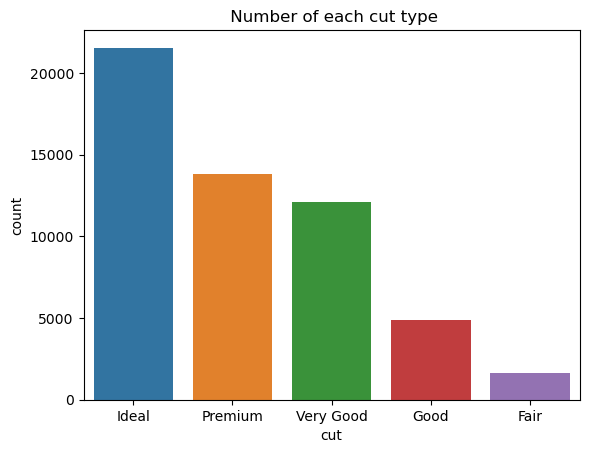

In [15]:
sns.barplot(x='cut',  y='count', data=diamonds.groupby('cut').size().reset_index(name='count'))
plt.title(' Number of each cut type')
plt.show()

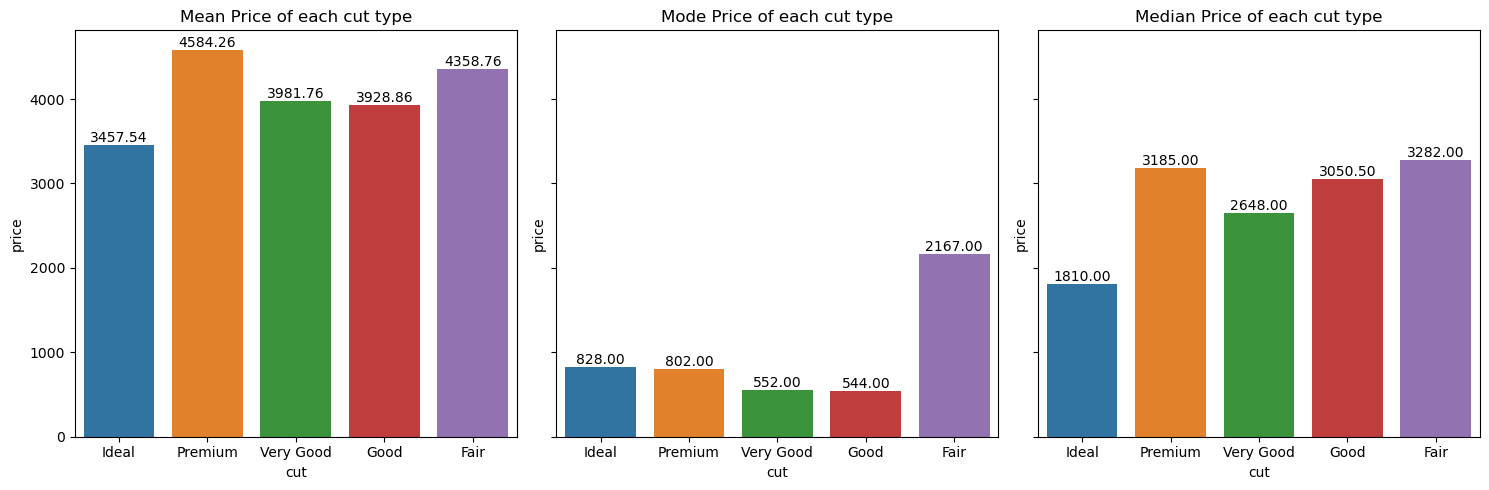

In [19]:
# Calculate the mean, mode, and median price for each category in the 'cut' column
mean_price_by_cut = diamonds.groupby('cut')['price'].mean().reset_index()
median_price_by_cut = diamonds.groupby('cut')['price'].median().reset_index()

# Define a function to handle multiple modes
def get_mode(x):
    mode_values = x.mode()
    return mode_values.iloc[0] if not mode_values.empty else np.nan

mode_price_by_cut = diamonds.groupby('cut')['price'].agg(get_mode).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot Mean Price
sns.barplot(x='cut', y='price', data=mean_price_by_cut, ax=axes[0])
axes[0].set_title('Mean Price of each cut type')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Plot Mode Price
sns.barplot(x='cut', y='price', data=mode_price_by_cut, ax=axes[1])
axes[1].set_title('Mode Price of each cut type')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Plot Median Price
sns.barplot(x='cut', y='price', data=median_price_by_cut, ax=axes[2])
axes[2].set_title('Median Price of each cut type')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [20]:
diamonds['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

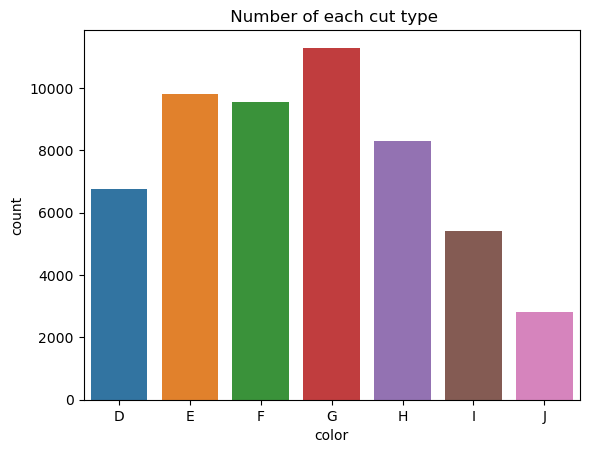

In [22]:
sns.barplot(x='color',  y='count', data=diamonds.groupby('color').size().reset_index(name='count'))
plt.title(' Number of each cut type')
plt.show()

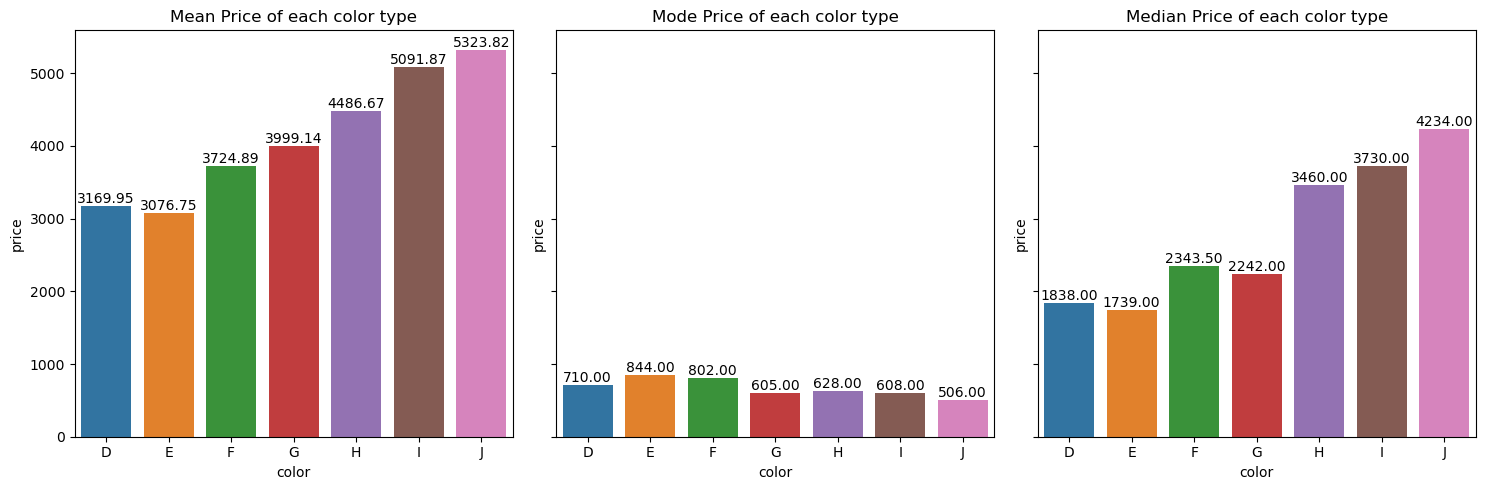

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean, mode, and median price for each category in the desired column
mean_price_by_color = diamonds.groupby('color')['price'].mean().reset_index()
median_price_by_color = diamonds.groupby('color')['price'].median().reset_index()

# Define a function to handle multiple modes
def get_mode(x):
    mode_values = x.mode()
    return mode_values.iloc[0] if not mode_values.empty else np.nan

mode_price_by_color = diamonds.groupby('color')['price'].agg(get_mode).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot Mean Price
sns.barplot(x='color', y='price', data=mean_price_by_color, ax=axes[0])
axes[0].set_title('Mean Price of each color type')
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Plot Mode Price
sns.barplot(x='color', y='price', data=mode_price_by_color, ax=axes[1])
axes[1].set_title('Mode Price of each color type')
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

# Plot Median Price
sns.barplot(x='color', y='price', data=median_price_by_color, ax=axes[2])
axes[2].set_title('Median Price of each color type')
for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()